# Part 2: Depth from Rectified Stereo Images

1. Write a program to estimate a depth map from the pair of rectified images in Figure 2 using an MRF and multiple label graphcuts.

In [1]:
import gco.pygco as pygco
import matplotlib.pyplot as plt
import numpy as np
import cv2

/opt/anaconda3/envs/nus/lib/python3.9/site-packages/gco/__init__.py:7: FutureWarning: In the future `np.bool` will be defined as the corresponding NumPy scalar.
  if not hasattr(numpy, name):


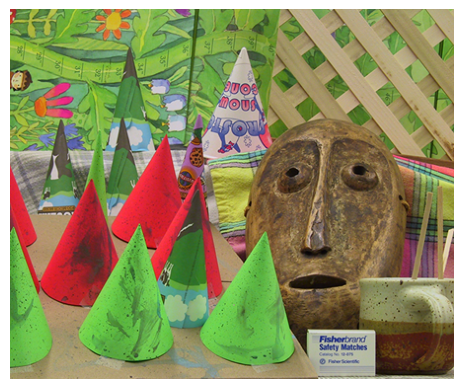

In [2]:
img1 = cv2.imread('part2_imags/image1.png')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
plt.imshow(img1)
plt.axis('off')
plt.show()

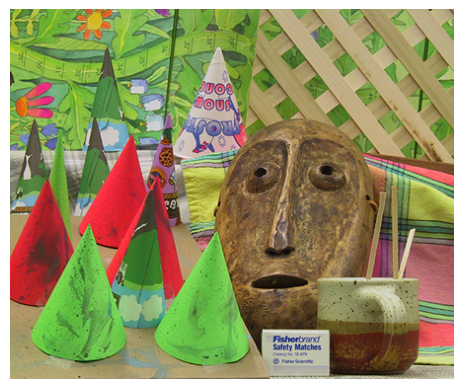

In [3]:
img2 = cv2.imread('part2_imags/image2.png')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
plt.imshow(img2)
plt.axis('off')
plt.show()

In [4]:
def dist(c1, c2):
    return np.sum(np.abs(c1 - c2)**2) / 255

h, w = img1.shape[:2]
number_D = 50 # the number of disparity candidates

# Data term:
data_term = np.zeros((h, w, number_D))

for y in range(h):
    for x in range(w):
        for d in range(number_D):
            c1 = img1[y, x]
            x2 = max(0, x-d)
            c2 = img2[y, x2]
            data_term[y, x, d] = dist(c1, c2)

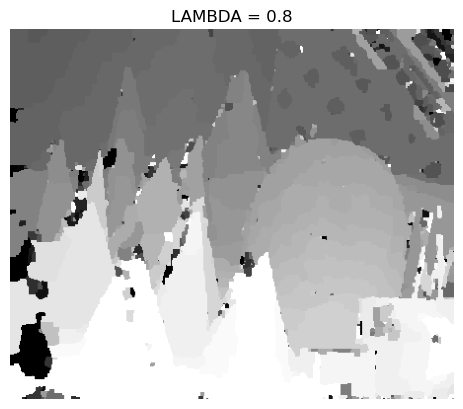

In [8]:
# Prior term:
prior_matrix = 1 - np.eye(number_D)

LAMBDA = 0.8
labels = pygco.cut_grid_graph_simple(data_term, LAMBDA * prior_matrix, n_iter=-1, algorithm= 'swap')
labels = labels.reshape(h, w)

plt.imshow(labels, cmap='gray')
plt.title(f'LAMBDA = {LAMBDA}')
plt.axis('off')
plt.show()

2. Show your best result and provide some discussion if necessary (particularly if the results are not as good as expected).

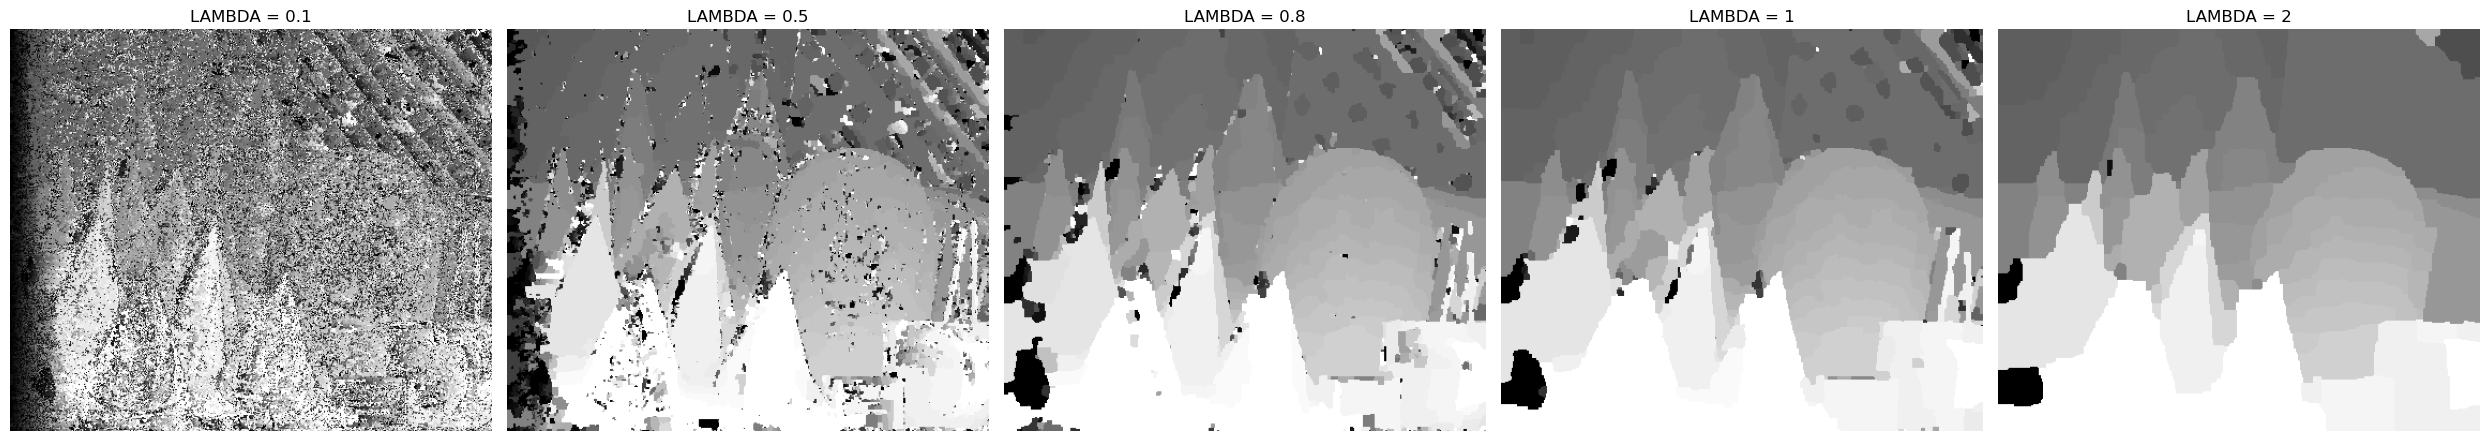

In [11]:
# Try different values of LAMBDA
LAMBDA_s =[0.1, 0.5, 0.8, 1, 2]

num_cols = len(LAMBDA_s)
fig, axes = plt.subplots(1, num_cols, figsize=(5*num_cols, 5))

for i, LAMBDA in enumerate(LAMBDA_s):
    labels = pygco.cut_grid_graph_simple(data_term, LAMBDA * prior_matrix, n_iter=-1, algorithm='swap')
    labels = labels.reshape(h, w)

    ax = axes[i]
    ax.imshow(labels, cmap='gray')
    ax.set_title(f'LAMBDA = {LAMBDA}')
    ax.axis('off')

plt.tight_layout()
plt.show()

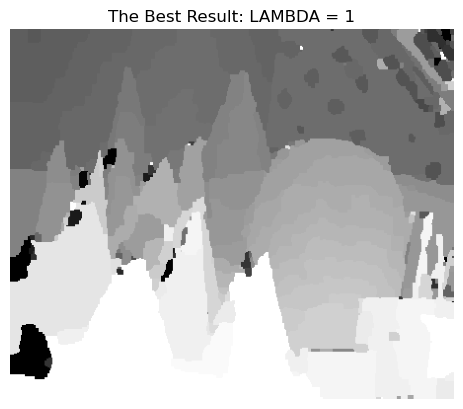

In [12]:
LAMBDA = 1
labels = pygco.cut_grid_graph_simple(data_term, LAMBDA * prior_matrix, n_iter=-1, algorithm= 'swap')
labels = labels.reshape(h, w)

plt.imshow(labels, cmap='gray')
plt.title(f'The Best Result: LAMBDA = {LAMBDA}')
plt.axis('off')
plt.show()

### Discussion:
When the value of lambda is relatively small, for instance, when it equals 0.1 or 0.5, the resulting depth map contains more details but exhibits higher noise. As the value of lambda increases, such as at 1 or 2, the image noise significantly decreases. However, the depth map contains fewer details, and the contours become blurred.   

This occurs because data term considers the observation while prior term only considers neighbor depth. As the value of lambda increases, the effect of the prior term also increases, leading to a better smoothing effect on the depth map.